In [134]:
# Steg 6
#
# Skall säkerställa vad modellen ger för svar i uppskattning från foto
# Den här filen har tagits fram för att kunna testa den givna CNN modellen på alla foton i en katalog
# På så vis kan en omfattande analys genomföras angående hur aktuell modell separerar katter och hundar
#
#

In [135]:

import numpy as np                   # för array matrix operationer
import matplotlib.pyplot as plt      # för att visualisera data
import os                            # för att iterera genom bibliotek med bilder
import cv2                           # för att uföra image operationer
import tensorflow as tf


In [136]:


IMG_SIZE = 75

DATADIR = "C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\"      # path till katalog med djurbilder
DATADIR_MOD = DATADIR                                     # path till sparad modell

TxT_MODEL_fName = DATADIR_MOD + 'step5-CNN-softmax-4_level_conv-15_epoch.keras'

#CATEGORIES = ["500pCats", "500pDogs"]
CATEGORIES = ["CatTest", "DogTest"]
#CATEGORIES = ["Cat", "Dog"]



In [137]:

def print_some_pic_values(path, category, img):
    print("_"*50)
    print(f"{path = }")
    print(f"{category = }")
    print(f"{img = }")
    

In [138]:

# Hämta upp aktuell modell

model = tf.keras.models.load_model(TxT_MODEL_fName)


In [139]:
# returnerar AI-modellens classificerade svar

class_names = CATEGORIES

def print_the_response(from_prediction):
    predicted_label = class_names[np.argmax(from_prediction[0])]
    print(f"Bild på djur klassad som: {predicted_label = }")
    
    print(f"       predicted possibility to be a Cat ->  {round((from_prediction[0][0])*1000)/10} %")
    print(f"       predicted possibility to be a Dog ->  {round((from_prediction[0][1])*1000)/10} %")
    return predicted_label


In [140]:


def prepare_the_image(filepath, OK=True):
    print(f"{filepath = }")
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    if OK:
        plt.subplot(1,2,1)
        plt.imshow(img_array, cmap="grey")
        plt.title(f"{img_array.size = }")
        plt.subplot(1,2,2)
        plt.imshow(new_array, cmap="grey")
        plt.title(f"{new_array.size = }")
        plt.show()
    
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)




In [141]:


def calculate_the_pred_vec(DATADIR, CATEGOR_Num=0, ShowPic=False, ShowTxT=False):
    #IMG_SIZE = 100
    vec_of_predictions = []
    category = CATEGORIES[CATEGOR_Num]
    print(category)
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        if ShowTxT:
            print_some_pic_values(path, category, img)
        
        img_file_path = os.path.join(path, img)
        pic_array = prepare_the_image(img_file_path, OK=ShowPic)
    
        normed_array = pic_array/255.0              # Normera gråskallenivå, (0,255) transformeras till (0,1), utan medlevärdesförskjutning
        prediction = model.predict([normed_array])
        vec_of_predictions.append(prediction)
        
    return vec_of_predictions



In [192]:



def make_a_sweet_histogram(vec_of_predictions, NumOfBins=25):
    def plot_a_hist(vec, bbins, TxT_XLabel, Show_sigmas=False):
        yx_mat = plt.hist( vec, bins=NumOfBins)
        mv = np.mean(vec)
        sv = np.std(vec)
        ymin = np.min(yx_mat[0])
        ymax = np.max(yx_mat[0])
        y10part = (ymax-ymin)/10
        
        plt.plot([mv, mv], [ymin, ymax], 'r--')
        if Show_sigmas:
            plt.plot([mv-sv, mv-sv], [ymin, ymax], 'g--')
            plt.plot([mv+sv, mv+sv], [ymin, ymax], 'g--')
            plt.plot([mv-2*sv, mv-2*sv], [ymin, ymax], 'y--')
            plt.plot([mv+2*sv, mv+2*sv], [ymin, ymax], 'y--')
            plt.text(mv-2*sv, ymax-2*y10part, (r'$\bar{x}$' + '$ \\minus 2\\sigma$'), size=12)
            plt.text(mv+2*sv, ymax-2*y10part, (r'$\bar{x}$' + '$ \\plus 2\\sigma$'), size=12)
            plt.text(mv-sv, ymax-1.2*y10part, (r'$\bar{x}$' + '$ \\minus \\sigma$'), size=12)
            plt.text(mv+sv, ymax-1.2*y10part, (r'$\bar{x}$' + '$ \\plus \\sigma$'), size=12)
            
        #plt.title(f"Total number of pictures: {len(vec)}")
        plt.xlabel(TxT_XLabel)
        #plt.ylabel("population")
        plt.text(mv, ymax-y10part, r'$\bar{x}$', size=13)
        

        
    i = 0
    vec_cat_pos = []
    vec_dog_pos = []
    for _ in vec_of_predictions:
        vec_cat_pos.append(vec_of_predictions[i][0][0])
        vec_dog_pos.append(vec_of_predictions[i][0][1])
        i += 1
    
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_a_hist(vec_cat_pos, NumOfBins, "Värde fördelning från prediktion\nNumerisk sannolikhet för Katt")
    #plt.title("Är det Katt", loc='right')
    
    plt.subplot(1, 2, 2)
    plot_a_hist(vec_dog_pos, NumOfBins, "Värde fördelning från prediktion\nNumerisk sannolikhet för Hund")
    plt.tight_layout()
    #plt.title("eller Hund", loc='left')
    



In [143]:


def print_some_sweet_values_from_the_prediction(vec_of_predictions):
    i = 0
    vec_1st_pos = []
    vec_2nd_pos = []
    for _ in vec_of_predictions:
        vec_1st_pos.append(vec_of_predictions[i][0][0])
        vec_2nd_pos.append(vec_of_predictions[i][0][1])
        i += 1
    
    print(f"{len(vec_1st_pos)  =  }")
    print(f"{np.mean(vec_1st_pos)  =  }             {np.mean(vec_2nd_pos)  =  }")


In [144]:
#
# Start med att analysera resultat från katalog med endast katter

vec_of_CAT_predictions = calculate_the_pred_vec(DATADIR)



CatTest
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2272.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2273.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2274.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2275.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2276.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2277.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2278.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2279.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTest\\cat2280.jpg'
1/1 ━━━━━━━━━━━━━━━━━

len(vec_1st_pos)  =  400
np.mean(vec_1st_pos)  =  0.96379197             np.mean(vec_2nd_pos)  =  0.03620807


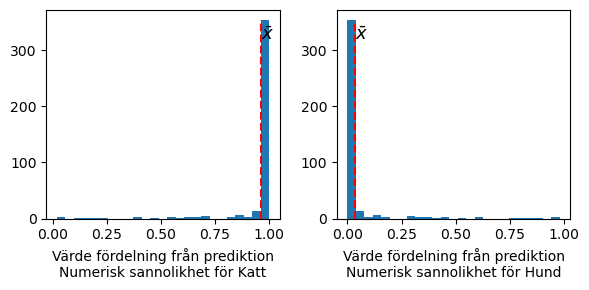

In [194]:


print_some_sweet_values_from_the_prediction(vec_of_CAT_predictions)

make_a_sweet_histogram(vec_of_CAT_predictions)


In [147]:
#
# Fortsätter med att analysera resultat från katalog med endast hundar

vec_of_Dog_predictions = calculate_the_pred_vec(DATADIR, CATEGOR_Num=1)


DogTest
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--EJV-0S_RAhDQbtUA8HhoAHaGi.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--GlCH31Wry6Uj4tAHTnIUwHaJv.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--GnTjiWNoY2Djyb3v7WXAgHaE7.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--hIXMAfOrmjSfDzjHHoZmwHaFj.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--HjjWS524SecIyPDEh8GNgHaJ4.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--HP-Jp3xDbJcfnayqlP7GwHaE7.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
filepath = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\DogTest\\OIP--hrVyxBHfXGXIpLKB_ld2AHaEK.jpeg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
filepath = 'C:\\LTH_data\\photo\\PythUt

len(vec_1st_pos)  =  480
np.mean(vec_1st_pos)  =  0.25675553             np.mean(vec_2nd_pos)  =  0.7432444


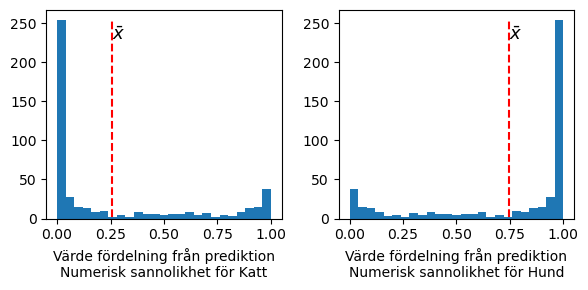

In [196]:

print_some_sweet_values_from_the_prediction(vec_of_Dog_predictions)

make_a_sweet_histogram(vec_of_Dog_predictions)
